In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
from skimage import util

Using TensorFlow backend.


In [0]:
batch_size = 128
epochs = 30

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

Using cv2 library for faster processing of greyscale images into B/W images.

In [0]:
th = 127
for i in range(60000):
  x_train[i] = cv2.threshold(x_train[i], th, 255,  cv2.THRESH_BINARY)[1]
for i in range(10000):
  x_test[i] = cv2.threshold(x_test[i], th, 255, cv2.THRESH_BINARY)[1]  

Code to do the same as cv2 library's optimized threshold function 

In [0]:
# def converter(arr):
#   th = 127  #256 RGB variations possible, so half of it will be taken as threshold for white/black
#   for i in range(len(arr)):
#     for j in range(len(arr)):
#       if arr[i][j] > th:
#         arr[i][j] = 255
#       else:
#         arr[i][j] = 0
#   return arr


# for i in range(60000):
#   x_train[i] = converter(x_train[i])
# for i in range(10000):
#   x_test[i] = converter(x_test[i])

In [0]:
x_train = x_train / 255 # normalization
x_test = x_test / 255 # normalization

In [0]:
cc_train = np.zeros_like(y_train)
cc_test = np.zeros_like(y_test)

In [0]:
for i in range(60000):
  l, n = scipy.ndimage.label(util.invert(x_train[i]))
  cc_train[i] = n
for i in range(10000):
  l, n = scipy.ndimage.label(util.invert(y_test[i]))
  cc_test[i] = n

Depth First Search algorithmn for finding out the number of regions created in the 28 *28 pixel map.

In [0]:
# class cc:
#   def __init__(self, row, col, g):
#     self.COL = col
#     self.ROW = row
#     self.GRAPH = g
  
#   def isSafe(self, i, j, v):
#     return (i >=0 and i < self.ROW and j>= 0 and j < self.COL and not v[i][j] adnd self.GRAPH[i][j])
  
#   def depthFirstSearch(self, i, j, v):
#     row = [-1, -1, -1, 0, 0, 1, 1, 1]
#     col = [-1, 0, 1, -1, 1, -1, 0, 1]
#     v[i][j] = True
#     for n in range(8):
#       if self.isSafe(i + row[n], j, col[n], v)
  
#   def counter(self):
#     v = [[False for j in range(self.COL)] for i in range(self.ROW)]
#     count = 0
#     for i in range(self.ROW):
#       for j in range(self.COL):
#         if v[i][j] == False and self.GRAPH[i][j] == 1:
#           self.depthFirstSearch(i, j, v)
#           count += 1
#     return count
  
# cc_list = []
# for i in x_train:
#   row = len(i)
#   col = len(i[0])
#   graph = cc(row, col, a)
#   cc_list.append(graph.counter())

# print(cc_list)

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

In [0]:
x_train = x_train.reshape(60000, 28*28) # data reshape before normalization
y_train = keras.utils.to_categorical(y_train, 10) # convert to categorical data instead of numerical data

In [0]:
x_test = x_test.reshape(10000,28*28) # data reshape before normalization
y_test = keras.utils.to_categorical(y_test,10) # convert to categorical data instead of numerical data

In [0]:
x_train = x_train.astype('float32') # Define as float32 type
x_test= x_test.astype('float32') # Define as float32 type
x_train /= 255 # normalization
x_test /= 255 # normalization

#normalize the cc_train and cc_test also // connected components
cc_train = cc_train / 4
cc_test = cc_test / 4

In [18]:
in_shape = keras.layers.Input((784,))
cc_feature = keras.layers.Input((1,)) # defining all parameters for a new layer
in_vector = keras.layers.Dense(64, activation='sigmoid')(in_shape)
nn = keras.layers.add([in_vector, cc_feature])
nn = keras.layers.Dense(10, activation='softmax')(nn)
nn = keras.models.Model(inputs = [in_shape, cc_feature], outputs = nn)
nn.compile(optimizer = keras.optimizers.SGD(lr = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = nn.fit([x_train, cc_train], y_train, epochs= epochs, batch_size= batch_size,  validation_data = ([x_test, cc_test], y_test))
metrics = nn.evaluate([x_test, cc_test],y_test, verbose =0)
print('Loss: ', metrics[0])
print('Accuracy: ', metrics[1]*100,'%')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 31us/step - loss: 1.0021 - acc: 0.7819 - val_loss: 0.5726 - val_acc: 0.8567
Epoch 2/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.4359 - acc: 0.8951 - val_loss: 0.4301 - val_acc: 0.8824
Epoch 3/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.3488 - acc: 0.9090 - val_loss: 0.3776 - val_acc: 0.8917
Epoch 4/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.3093 - acc: 0.9171 - val_loss: 0.3549 - val_acc: 0.8952
Epoch 5/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.2849 - acc: 0.9220 - val_loss: 0.3426 - val_acc: 0.8990
Epoch 6/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.2669 - acc: 0.9263 - val_loss: 0.3401 - val_acc: 0.8991
Epoch 7/

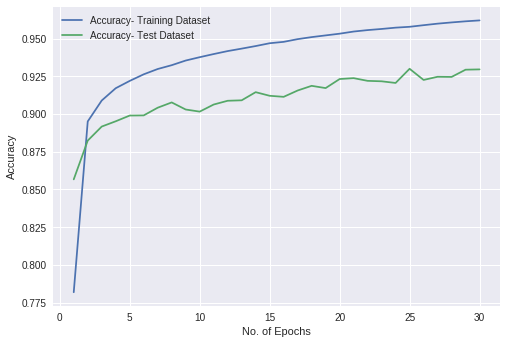

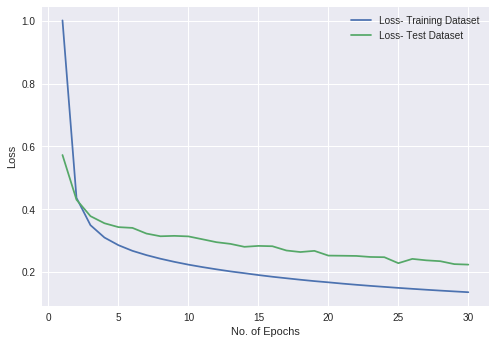

In [19]:
acc = plt.plot(range(1,31),train.history['acc'],range(1,31), train.history['val_acc'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Accuracy- Training Dataset', 'Accuracy- Test Dataset'))
plt.show(acc)

los = plt.plot(range(1,31),train.history['loss'],range(1,31), train.history['val_loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(('Loss- Training Dataset', 'Loss- Test Dataset'))
plt.show(acc)
